## Investigating Fandango Movie Ratings

This project is intended to find out if Fandango made any changes in the movie ratings system since the release of [Walt Hickey's article][monsite] from 2015 to 2017.

My personal goal in this project is to practice data analysis through usage of statistical basics we learned on the previous missions

[monsite]: https://fivethirtyeight.com/features/fandango-movies-ratings/ 

In [1]:
import pandas as pd

fandango_score=pd.read_csv("fandango_score_comparison.csv")
movie_rating=pd.read_csv("movie_ratings_16_17.csv")

In [2]:
fandango_previous=fandango_score[['FILM', 'Fandango_Stars', 
                                  'Fandango_Ratingvalue', 'Fandango_votes', 
                                  'Fandango_Difference']]
fandango_after=movie_rating[['movie', 'year', 'fandango']]

In [4]:
print(fandango_score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [5]:
print(movie_rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None


### Population
The population of interest is the movies ratings on Fandango 

### Sampling
The first sample in the dataset 'fandango_score_comparison' describes movies from fandango having more than 30 reviews and also a score on other online critics sites for the year 2015

The second sample in the dataset 'movie_rating' describes movies that have 'a significant' number of reviews (we don't know how many...) for the years 2016 and 2017

**Because of the reasons stated above, I'm though not that much sure if the sampling is random**  

### Setting new goals
The sampling is not random because :

* in the first sample, movies must have more than 30 reviews and tickets must have been sold for that movies.
* in the second sample, movies have a significant number of reviews (how much?) and movies have been released in 2016 and 2017

In both sample, there is a temporal bias (temporal trend, trends specifics to the year the scrapping was done). Also, all movies does not have a chance to be picked as movies having less than 30 (or significant reviews) will never be picked.

**We can change the goal by resetting the population of interest :: for example, by adding some boundaries of time => describing the trend in the ratings from 2015 to 2017 on Fandango.**

In [25]:
print(fandango_previous['Fandango_votes'].describe())

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64


In [26]:
print(fandango_after['fandango'].describe())

count    214.000000
mean       3.894860
std        0.516781
min        2.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: fandango, dtype: float64


In [27]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [35]:
fandango_previous.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


* The first sample has all his movies with more than 30 reviews (the min is 35)
* However, the second sample does not have info about the number of reviews.

A quick way to check if the second sample has enough popular movies is to compare the name of the movie and keep in the dataset 'fandango_after' all the movies that also belong to the 'fandango_before' dataset **=> this can't work as you will never find out a same movie released on different years**

In the solution notebook, they propose to randomly select a sample in the 'after' dataset (10 movies) and check ourselves if they have more than 30 reviews on fandango. We want an accuracy of at least 80%

They did it in 2018 and found that 90% of the randomly picked movies has (much) more than 30 reviews, which allow us safely pursuie our analysis... 

In [3]:
liste_year=[]
liste_film=[]
for elmt in fandango_previous['FILM']:
    liste=elmt.split('(')
    an1=liste[1].replace(')','')
    an=int(an1)
    film=liste[0].rstrip()
    liste_year.append(an)
    liste_film.append(film)

fandango_previous['year']=liste_year
fandango_previous['FILM']=liste_film

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
print(fandango_previous.head(10))

                      FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron             5.0                   4.5   
1               Cinderella             5.0                   4.5   
2                  Ant-Man             5.0                   4.5   
3          Do You Believe?             5.0                   4.5   
4   Hot Tub Time Machine 2             3.5                   3.0   
5        The Water Diviner             4.5                   4.0   
6           Irrational Man             4.0                   3.5   
7                 Top Five             4.0                   3.5   
8    Shaun the Sheep Movie             4.5                   4.0   
9             Love & Mercy             4.5                   4.0   

   Fandango_votes  Fandango_Difference  year  
0           14846                  0.5  2015  
1           12640                  0.5  2015  
2           12055                  0.5  2015  
3            1793                  0.5  2015  
4            102

In [38]:
print(fandango_previous['FILM'])

In [4]:
fandango_previous_2015=fandango_previous[fandango_previous["year"]==2015]
fandango_after_2016=fandango_after[fandango_after["year"]==2016]

In [50]:
fandango_previous_2015.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015
5,The Water Diviner,4.5,4.0,397,0.5,2015
6,Irrational Man,4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie,4.5,4.0,896,0.5,2015
9,Love & Mercy,4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd,4.5,4.0,804,0.5,2015


In [41]:
fandango_after_2016.head(10)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


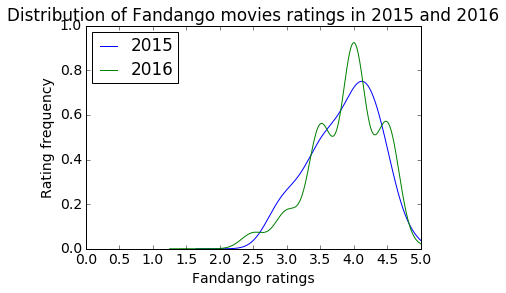

In [6]:
#kernel density plots
import matplotlib.pyplot as plt
%matplotlib inline

tick_positions=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
fandango_previous_2015['Fandango_Ratingvalue'].plot.kde(label = '2015', legend = True) 
fandango_after_2016['fandango'].plot.kde(label = '2016', legend = True) 
#plt.axvline(x=497, label='Average', color='red') 
plt.xlabel('Fandango ratings')
plt.ylabel('Rating frequency')
plt.legend(loc='upper left')
plt.title('Distribution of Fandango movies ratings in 2015 and 2016')
plt.xlim(0,5)
plt.xticks(tick_positions)
plt.style.use('fivethirtyeight')

plt.show()

#### KDE Analysis
* Shape => both seem to have a right skewed distribution
* Both shape are approximately the same
* maybe the frequency of 4-point ratings that increased and the less smooth shape of the year 2016.
* The movies in 2016 seem to have been more frequently compared higher than in the year 2016 
**\!/ Attention !!! \!/ Viens de me rendre compte que je n'ai pas utilisé la bonne colonne de fandango_previous_2015. Il faut utiliser 'Fandango_Stars'. Faire attention à la lecture des différents dictionnaires pour ne pas se tromper de colonne!!!**

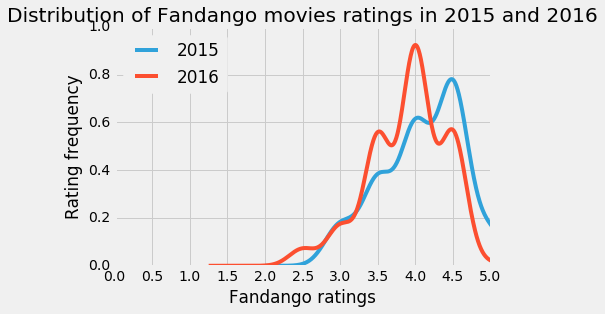

In [7]:
#Correction
fandango_previous_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True) 
fandango_after_2016['fandango'].plot.kde(label = '2016', legend = True) 
#plt.axvline(x=497, label='Average', color='red') 
plt.xlabel('Fandango ratings')
plt.ylabel('Rating frequency')
plt.legend(loc='upper left')
plt.title('Distribution of Fandango movies ratings in 2015 and 2016')
plt.xlim(0,5)
plt.xticks(tick_positions)
plt.style.use('fivethirtyeight')

plt.show()

#### KDE Analysis
* Shape => both seem to have a right skewed distribution
* Both shape are approximately the same
* The frequency of 4-stars ratings has increased but we can clearly see a slightly decrease of the ratings after 4.25 in 2016
* The movies in 2016 seem to have been less frequently compared higher than in the year 2015

In [59]:
fandango_previous_2015['Fandango_Stars'].value_counts(normalize=True, ascending=False)*100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [63]:
fandango_after_2016['fandango'].value_counts(normalize=True, ascending=False)*100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

**For me the difference is still clear, when we compare the ratings visually, we see an increase in the frequency of the ratings until we reach a 4-stars ratings from which the frequency starts decreasing **

In [8]:
#For 2015
mean_2015=fandango_previous_2015['Fandango_Stars'].mean()
median_2015=fandango_previous_2015['Fandango_Stars'].median()
mode_2015=fandango_previous_2015['Fandango_Stars'].mode().tolist()

print(mean_2015)
print(median_2015)
print(mode_2015)

4.0852713178294575
4.0
[4.5]


In [9]:
#For 2016
mean_2016=fandango_after_2016['fandango'].mean()
median_2016=fandango_after_2016['fandango'].median()
mode_2016=fandango_after_2016['fandango'].mode().tolist()

print(mean_2016)
print(median_2016)
print(mode_2016)

3.887434554973822
4.0
[4.0]


In [10]:
magnitude=(mean_2015-mean_2016)*100
print(magnitude)

metriques= pd.DataFrame({'metrics': [mean_2015, median_2015, mode_2015, mean_2016, median_2016, mode_2016], 'year': [2015, 2015, 2015, 2016, 2016, 2016], 'label':['mean', 'median', 'mode','mean', 'median', 'mode']},
                      index = [0,1,2,3,4,5])
print(metriques)

19.783676285563566
    label  metrics  year
0    mean  4.08527  2015
1  median        4  2015
2    mode    [4.5]  2015
3    mean  3.88743  2016
4  median        4  2016
5    mode    [4.0]  2016


On voit une baisse de la moyenne des notes en 2016, de même que de la moyenne des notes.

Une différence de d'environ 20% 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


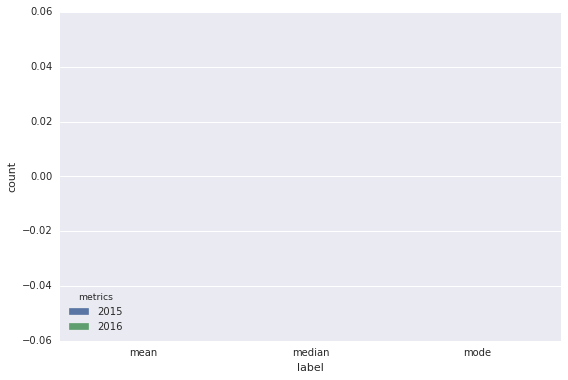

In [74]:
# Graphique de barre groupé
import seaborn as sns 

sns.countplot(x = 'label', hue = 'metrics', data = metriques, order=['mean', 'median', 'mode'], hue_order=['2015', '2016']) 

In [11]:
metriques1= pd.DataFrame({'2015': [mean_2015, median_2015, mode_2015[0]], '2016': [mean_2016, median_2016, mode_2016[0]]},
                      index = ['mean', 'median', 'mode'])
metriques1

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


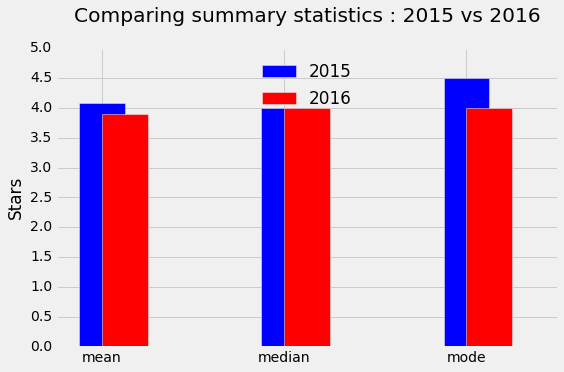

In [15]:
metriques1['2015'].plot.bar(label = '2015', legend = True, color='blue', align = 'center', width = .25)
metriques1['2016'].plot.bar(label = '2016', legend = True, color='red', align = 'edge', width = .25, rot = 0, figsize = (8,5))

plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.title('Comparing summary statistics : 2015 vs 2016', y = 1.07)
plt.ylim(0,5)
plt.yticks(tick_positions)
plt.style.use('fivethirtyeight')

plt.show()